In [ ]:
from data_master_eng_ml.config import (
    DAGSHUB_TOKEN,
    GAMES_SILVER_COLLECTION,
    MONGODB_DATABASE_SILVER
    
)

In [1]:
from processing.data_loader import load_data
from processing.preprocessor import build_preprocessor
from processing.evaluation import evaluate_model
from models.model import train_model, predict_model
from visualization.plot_feature_importance import plot_feature_importance
from sklearn.model_selection import train_test_split

In [2]:
# Caminho para os dados
file_path = "data/twitch_api_data_2021.csv"

# Carregar os dados
df = load_data(file_path)

# Separara variável alvo e as features
X = df.drop(columns=["target", "id", "name"])
y = df["target"].values.ravel()

# Dividir os dados em treino e teste

X_train, X_test, y_train, y_test = train_test_split(
    X, y, test_size=0.2, random_state=42
)

In [3]:


# Identificar colunas numéricas e categóricas

numerical_cols = X.select_dtypes(include=["int64", "float64"]).columns
categorical_cols = X.select_dtypes(include=["object"]).columns

# Criar o preprocessor

preprocessor = build_preprocessor(numerical_cols, categorical_cols)

# Aplicar preprocessamento

X_train = preprocessor.fit_transform(X_train)
X_test = preprocessor.transform(X_test)

2024/08/13 19:54:57 WARNING mlflow.models.model: Input example should be provided to infer model signature if the model signature is not provided when logging the model.



Métricas e Gráficos de Treino:


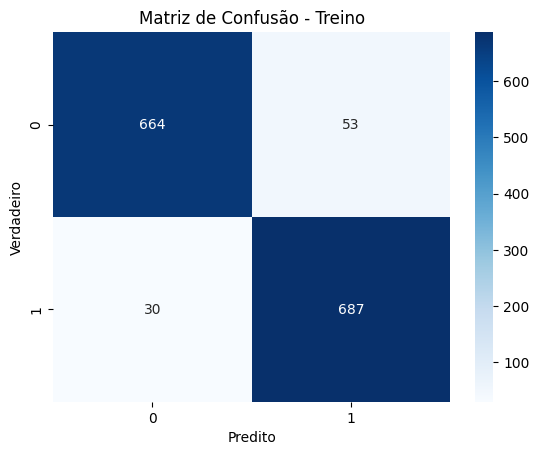

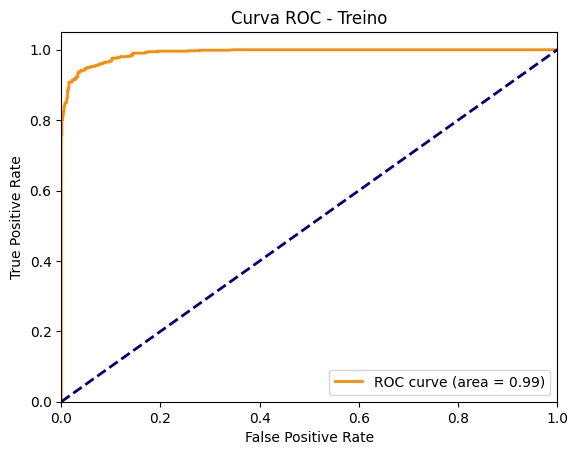


Métricas e Gráficos de Teste:


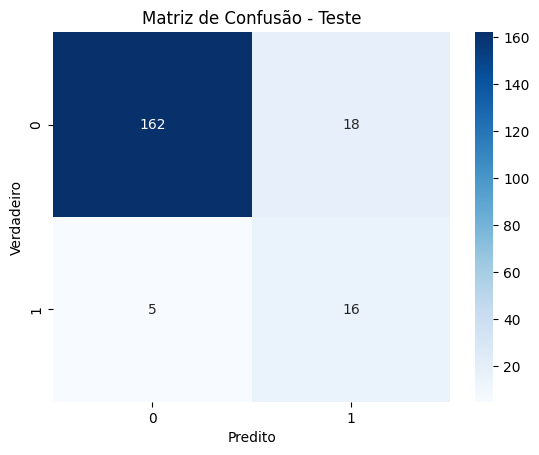

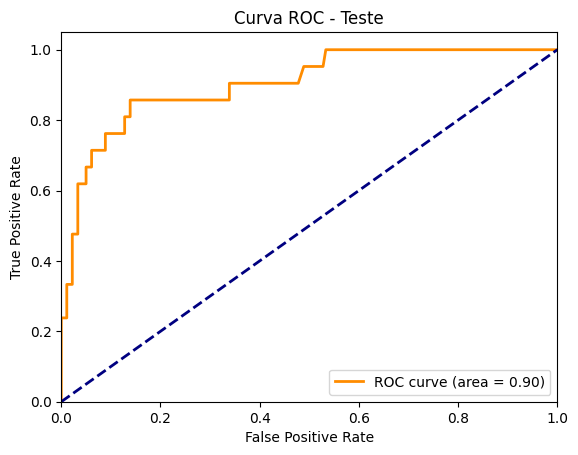

In [4]:
# Definir os parâmetros do modelo (opcionalmente você pode definir parâmetros específicos para cada algoritmo)

xgboost_params = {
    "objective": "binary:logistic",
    "eval_metric": "logloss",
    "max_depth": 3,
    "learning_rate": 0.015,
    "subsample": 0.8,
    "colsample_bytree": 0.8,
    "gamma": 1,
    "reg_alpha": 0.35,
    "reg_lambda": 0.45,
    "seed": 42,
}

# Treinar o modelo usando XGBoost com SMOTE

model = train_model(
    X_train,
    y_train,
    X_test,
    y_test,
    algorithm="xgboost",
    params=xgboost_params,
    use_smote=True,
    experiment_name="Experimento_XGBoost",
)


Acurácia: 0.8855721393034826
ROC AUC: 0.9043650793650794
F1 Score: 0.5818181818181818
Relatório de Classificação:
               precision    recall  f1-score   support

           0       0.97      0.90      0.93       180
           1       0.47      0.76      0.58        21

    accuracy                           0.89       201
   macro avg       0.72      0.83      0.76       201
weighted avg       0.92      0.89      0.90       201



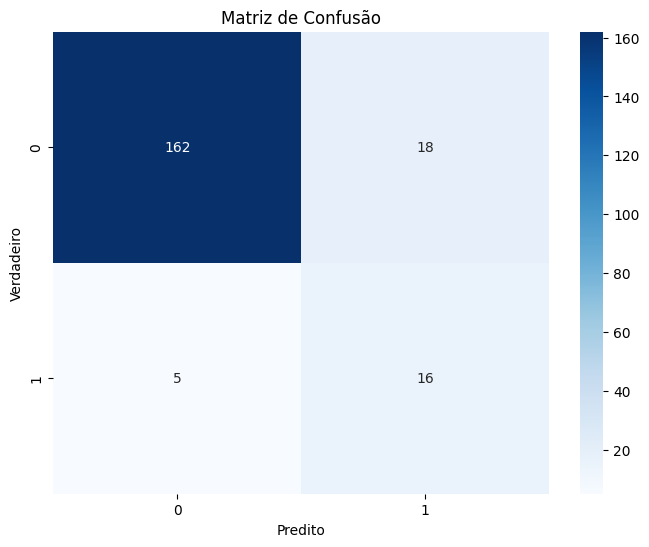

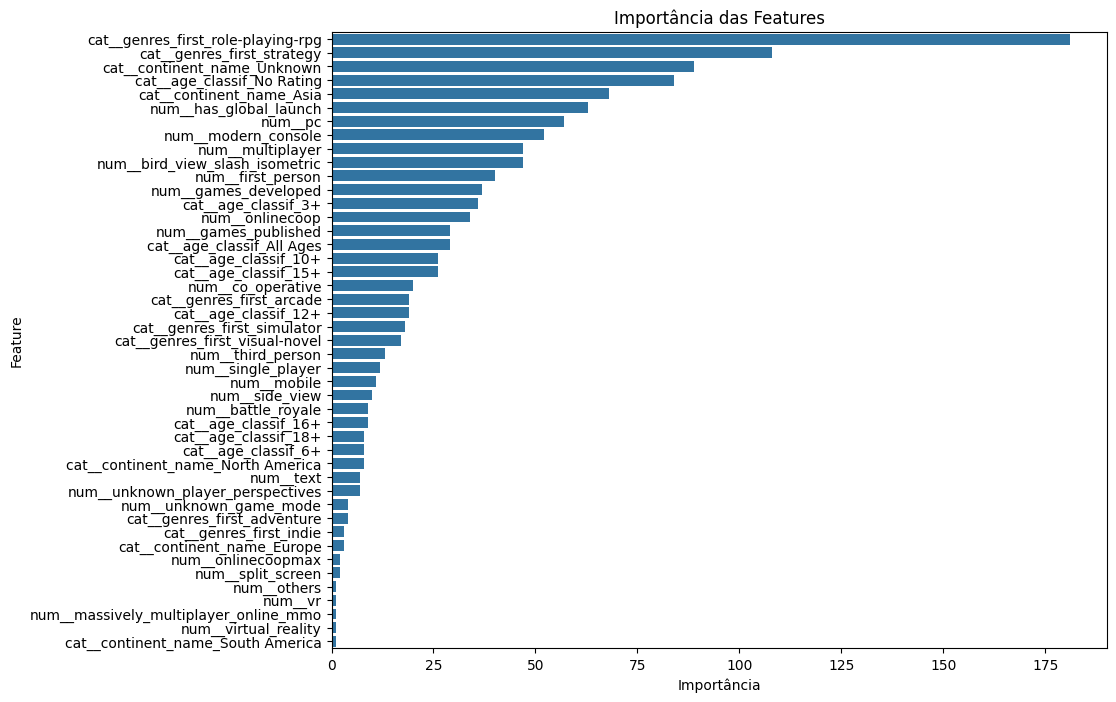

In [5]:

# Fazer previsões no conjunto de teste

y_test_pred, y_test_pred_proba = predict_model(model, X_test,algorithm="xgboost",)

# Avaliar o modelo

evaluate_model(y_test, y_test_pred, y_test_pred_proba)
